In [8]:
pip install librosa speechrecognition

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os

directory='D:/Pride/archive (6)/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test'
audio_files=[os.path.join(directory,file) for file in os.listdir(directory) if file.endswith('.wav')]

In [10]:
pip install noisereduce

Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa
import noisereduce as nr
import numpy as np

def preprocess_audio(file_path,target_sr=16000,n_mfcc=13,max_length=500):
    # Load the audio file
    audio_data,sample_rate=librosa.load(file_path,sr=None)
    # Resample the audio to the target sampling rate
    audio_data=librosa.resample(audio_data,orig_sr=sample_rate,target_sr=target_sr)
    #Reduce noise
    audio_data=nr.reduce_noise(y=audio_data,sr=target_sr)
    #normalize the audio
    audio_data=librosa.util.normalize(audio_data)
    #remove silence
    intervals=librosa.effects.split(audio_data,top_db=20)
    trimmed_audio=np.concatenate([audio_data[start:end]for start,end in intervals])
    #Extract features
    mfccs=librosa.feature.mfcc(y=trimmed_audio,sr=target_sr,n_mfcc=n_mfcc)

    # Pad or truncate the MFCCs to have a fixed number of frames
    if mfccs.shape[1] < max_length:
        padding = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, padding)), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]
    return mfccs

In [12]:
processed_data = []
for file in audio_files:
    mfcc_features = preprocess_audio(file)
    processed_data.append(mfcc_features)

In [13]:
import pickle

In [14]:
with open('processed_audio_data.pkl','wb') as f:
    pickle.dump(processed_data,f)

In [15]:
import os

output_directory = 'D:/Pride/processedtestrecordings'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for i, file in enumerate(audio_files):
    mfcc_features = preprocess_audio(file)
    output_file = os.path.join(output_directory, f'processed_{i}.npy')
    np.save(output_file, mfcc_features)


In [16]:
processed_data = []
output_directory = 'D:/Pride/processedtestrecordings'
for file in os.listdir(output_directory):
    mfcc_features = np.load(os.path.join(output_directory, file))
    processed_data.append(mfcc_features)

processed_data = np.array(processed_data)

In [17]:
processed_data

array([[[-423.40814  , -238.45726  , -146.9012   , ...,    0.       ,
            0.       ,    0.       ],
        [ 138.90808  ,  197.12598  ,  182.38872  , ...,    0.       ,
            0.       ,    0.       ],
        [  24.100864 ,   -9.734789 ,  -25.821651 , ...,    0.       ,
            0.       ,    0.       ],
        ...,
        [  13.407276 ,   12.208566 ,    5.9300003, ...,    0.       ,
            0.       ,    0.       ],
        [ -10.243616 ,  -19.48965  ,  -20.845516 , ...,    0.       ,
            0.       ,    0.       ],
        [ -14.226955 ,  -23.664047 ,  -22.955446 , ...,    0.       ,
            0.       ,    0.       ]],

       [[-307.56473  , -154.1708   , -124.64818  , ...,    0.       ,
            0.       ,    0.       ],
        [  96.40982  ,  132.57806  ,  161.28465  , ...,    0.       ,
            0.       ,    0.       ],
        [   6.6301327,   21.349323 ,   22.067184 , ...,    0.       ,
            0.       ,    0.       ],
        ...,


In [18]:
processed_data.shape

(5895, 13, 500)

In [19]:
import os

directory='D:/Pride/archive (6)/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/train'
audio_files=[os.path.join(directory,file) for file in os.listdir(directory) if file.endswith('.wav')]

In [20]:
processed_data1 = []
for file in audio_files:
    mfcc_features = preprocess_audio(file)
    processed_data1.append(mfcc_features)

In [21]:
import pickle
with open('processed_audio_data.pkl','wb') as f:
    pickle.dump(processed_data1,f)

In [22]:
import os

output_directory = 'D:/Pride/processedtrainrecordings'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for i, file in enumerate(audio_files):
    mfcc_features = preprocess_audio(file)
    output_file = os.path.join(output_directory, f'processed_{i}.npy')
    np.save(output_file, mfcc_features)

In [23]:
processed_data1 = []
output_directory = 'D:/Pride/processedtrainrecordings'
for file in os.listdir(output_directory):
    mfcc_features = np.load(os.path.join(output_directory, file))
    processed_data1.append(mfcc_features)

processed_data1 = np.array(processed_data1)

In [24]:
processed_data1

array([[[-3.49143890e+02, -2.38424393e+02, -1.68569000e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.41617981e+02,  1.45869202e+02,  1.09172195e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.25056763e+01, -9.00064697e+01, -1.14301926e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.04046214e+00, -1.44149208e+01, -2.00019779e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.03323460e+01, -1.41621084e+01, -3.07244277e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.09194832e+01, -3.19568138e+01, -4.48857117e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-3.94645081e+02, -2.35716446e+02, -1.21840973e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 9.96305542e+01,  1.47437378e+02,  1.12028595e+02, ...,
          0.00000000e+00,  0.00000000e

In [25]:
processed_data1.shape

(385, 13, 500)

In [26]:
import os

directory='D:/Pride/archive (6)/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/validate'
audio_files=[os.path.join(directory,file) for file in os.listdir(directory) if file.endswith('.wav')]

In [27]:
processed_data2 = []
for file in audio_files:
    mfcc_features = preprocess_audio(file)
    processed_data2.append(mfcc_features)

In [28]:
import pickle
with open('processed_audio_data.pkl','wb') as f:
    pickle.dump(processed_data2,f)

In [29]:
import os

output_directory = 'D:/Pride/processedvalidaterecordings'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for i, file in enumerate(audio_files):
    mfcc_features = preprocess_audio(file)
    output_file = os.path.join(output_directory, f'processed_{i}.npy')
    np.save(output_file, mfcc_features)

In [30]:
processed_data2 = []
output_directory = 'D:/Pride/processedvalidaterecordings'
for file in os.listdir(output_directory):
    mfcc_features = np.load(os.path.join(output_directory, file))
    processed_data2.append(mfcc_features)

processed_data2 = np.array(processed_data2)

In [31]:
processed_data2

array([[[-2.93719818e+02, -1.82018585e+02, -1.68833282e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.73006439e+01,  9.96670456e+01,  9.83389587e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.23650375e+02, -1.32736725e+02, -1.18956406e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.80752897e+00, -7.39246559e+00, -1.16669073e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.86572838e+00, -2.32641678e+01, -2.51849442e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.72570324e+01,  8.43071747e+00,  3.81480575e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-4.13360016e+02, -1.78678818e+02, -1.06899017e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.17500114e+00,  1.46729374e+00,  1.29743414e+01, ...,
          0.00000000e+00,  0.00000000e

In [32]:
processed_data2.shape

(385, 13, 500)

In [33]:
import numpy as np

# Accessing the first preprocessed audio file's features
first_file_features = processed_data[0]

# Print the shape of the feature matrix
print(f"Shape of the first file's features: {first_file_features.shape}")

# View a part of the data (e.g., the first few MFCC coefficients)
print(first_file_features[:5, :10])  # First 5 MFCCs for the first 10 frames


Shape of the first file's features: (13, 500)
[[-423.40814  -238.45726  -146.9012    -86.61972   -51.235878  -28.037117
   -52.85252   -96.2393   -153.39763  -230.70679 ]
 [ 138.90808   197.12598   182.38872   144.31247   115.998566  128.3428
   142.7849    149.67078   174.48665   198.24716 ]
 [  24.100864   -9.734789  -25.821651  -33.73353   -48.04648   -38.930534
   -25.763329  -23.350407  -11.124971   14.567197]
 [ -30.51324   -34.10492   -34.70543   -41.04638   -45.291115  -41.20106
   -32.075607  -21.720932  -18.450212   -9.37188 ]
 [ -29.387386  -60.461075  -53.936768  -45.911476  -36.090622  -38.51992
   -47.118683  -46.51821   -45.74095   -53.34426 ]]


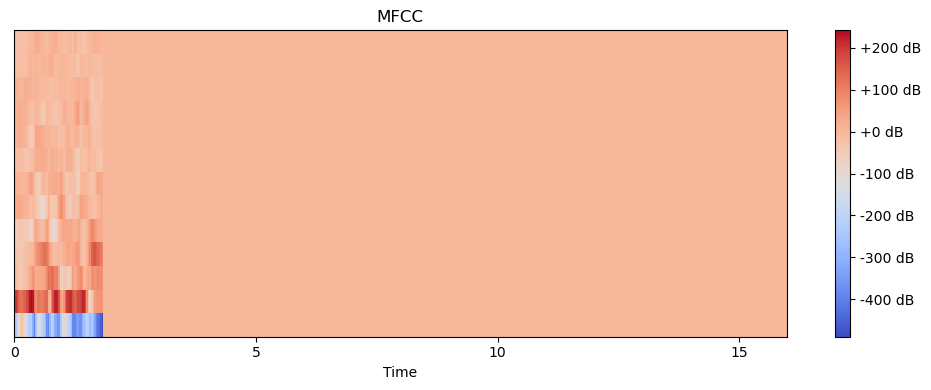

In [34]:
import matplotlib.pyplot as plt
import librosa.display

# Visualizing the MFCCs of the first file
plt.figure(figsize=(10, 4))
librosa.display.specshow(first_file_features, x_axis='time', sr=16000)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [35]:
from IPython.display import Audio

# Assuming 'audio_files' contains paths to the original audio files
Audio(filename=audio_files[100])


In [36]:
# Example: Compute the mean and standard deviation of the MFCCs across all files
mean_mfcc = np.mean([np.mean(data) for data in processed_data])
std_mfcc = np.std([np.std(data) for data in processed_data])

print(f"Mean of MFCCs: {mean_mfcc:.2f}")
print(f"Standard Deviation of MFCCs: {std_mfcc:.2f}")


Mean of MFCCs: -3.36
Standard Deviation of MFCCs: 10.23


In [37]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Activation, Masking, Input, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler

In [49]:
processed_data.shape

(5895, 13, 500)